# GA for continuous

In [1]:
from numpy.random import randint
from numpy.random import rand

In [3]:
def objective(x):
    return x[0]**2.0 + x[1]**2.0

In [4]:
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        chars = ''.join([str(s) for s in substring])
        integer = int(chars, 2)
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        decoded.append(value)
    return decoded

In [5]:
def selection(pop, scores, k=3):
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [6]:
def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if rand() < r_cross:
        pt = randint(1, len(p1)-2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

In [7]:
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i]

In [8]:
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
    for gen in range(n_iter):
        decoded = [decode(bounds, n_bits, p) for p in pop]
        scores = [objective(d) for d in decoded]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">iteration %d, new best f(%s) = %f" % (gen, decoded[i],scores[i]))
        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
            pop = children
    return [best, best_eval]

In [9]:
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
n_iter = 100
n_bits = 16
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / (float(n_bits) * len(bounds))
print(f'Starting genetic algorithm\n')
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross,r_mut)
decoded = decode(bounds, n_bits, best)
print(f'\nGenetic algorithm completed\n')
print(f'Best solution: {decoded}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting genetic algorithm

>iteration 0, new best f([-0.242767333984375, -0.453033447265625]) = 0.264175
>iteration 2, new best f([0.24932861328125, 0.391387939453125]) = 0.215349
>iteration 3, new best f([-0.03387451171875, 0.40679931640625]) = 0.166633
>iteration 3, new best f([0.24932861328125, 0.171966552734375]) = 0.091737
>iteration 4, new best f([-0.245819091796875, -0.15716552734375]) = 0.085128
>iteration 4, new best f([-0.006256103515625, -0.261993408203125]) = 0.068680
>iteration 5, new best f([-0.01251220703125, -0.145721435546875]) = 0.021391
>iteration 5, new best f([-0.0335693359375, -0.113983154296875]) = 0.014119
>iteration 5, new best f([-0.03387451171875, 0.0885009765625]) = 0.008980
>iteration 7, new best f([-0.03387451171875, 0.087890625]) = 0.008872
>iteration 7, new best f([-0.03387451171875, 0.052032470703125]) = 0.003855
>iteration 7, new best f([-0.0390625, -0.0042724609375]) = 0.001544
>iteration 8, new best f([-0.03265380859375, 0.012969970703125]) = 0.0012

# GA for binary

In [10]:
def onemax(x):
    return -sum(x)

In [11]:
selection

<function __main__.selection(pop, scores, k=3)>

In [14]:
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    best, best_eval = 0, objective(pop[0])
    for gen in range(n_iter):
        scores = [objective(c) for c in pop]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">iteration %d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
            selected = [selection(pop, scores) for _ in range(n_pop)]
            children = list()
            for i in range(0, n_pop, 2):
                p1, p2 = selected[i], selected[i+1]
                for c in crossover(p1, p2, r_cross):
                    mutation(c, r_mut)
                    children.append(c)
            pop = children
        return [best, best_eval]

In [15]:
n_iter = 100
n_bits = 20
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / float(n_bits)
print(f'Starting genetic algorithm\n')
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print(f'\nGenetic algorithm completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting genetic algorithm

>iteration 0, new best f([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]) = -11.000
>iteration 0, new best f([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]) = -12.000
>iteration 0, new best f([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]) = -13.000
>iteration 0, new best f([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]) = -14.000
>iteration 0, new best f([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]) = -15.000

Genetic algorithm completed

Best solution: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
Fitness score of the best solution: -15.00000


# Simulated Annealing

In [16]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

In [18]:
def objective(x):
    return x[0]**2.0

In [30]:
def simulated_annealing(objective, bounds, n_iter, step_size, temp):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    for i in range(n_iter):
        candidate = curr + randn(len(bounds)) * step_size
        candidate_eval = objective(candidate)
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            print('>iteration %d: f(%s) = %.5f' % (i, best, best_eval))
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]

In [31]:
seed(1)
bounds = asarray([[-5.0, 5.0]])
n_iter = 1000
step_size = 0.1
temp = 10
print('Starting simulated annealing algorithm\n')
best, score = simulated_annealing(objective, bounds, n_iter, step_size,temp)
print('\nSimulated annealing completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting simulated annealing algorithm

>iteration 34: f([-0.78753544]) = 0.62021
>iteration 35: f([-0.76914239]) = 0.59158
>iteration 37: f([-0.68574854]) = 0.47025
>iteration 39: f([-0.64797564]) = 0.41987
>iteration 40: f([-0.58914623]) = 0.34709
>iteration 41: f([-0.55446029]) = 0.30743
>iteration 42: f([-0.41775702]) = 0.17452
>iteration 43: f([-0.35038542]) = 0.12277
>iteration 50: f([-0.15799045]) = 0.02496
>iteration 66: f([-0.11089772]) = 0.01230
>iteration 67: f([-0.09238208]) = 0.00853
>iteration 72: f([-0.09145261]) = 0.00836
>iteration 75: f([-0.05129162]) = 0.00263
>iteration 93: f([-0.02854417]) = 0.00081
>iteration 144: f([0.00864136]) = 0.00007
>iteration 149: f([0.00753953]) = 0.00006
>iteration 167: f([-0.00640394]) = 0.00004
>iteration 225: f([-0.00044965]) = 0.00000
>iteration 503: f([-0.00036261]) = 0.00000
>iteration 512: f([0.00013605]) = 0.00000

Simulated annealing completed

Best solution: [0.00013605]
Fitness score of the best solution: 0.00000


# Ant colony

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [30]:
def generate_graph(n,n_edges,low,high,seed=1):
    g=nx.generators.complete_graph(n)
    g.add_weighted_edges_from([(a,b,np.random.randint(low,high)) for a,b in g.edges()])
    nx.set_node_attributes(g,nx.spring_layout(g),"pos") 
    return g

In [31]:
def plot_graph(g, title="", highlight_edges=[]):
    pos = nx.spring_layout(g)  
    plt.figure(figsize=(8, 8))
    plt.title(title)
    nx.draw(g, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=nx.get_edge_attributes(g, "weight"))
    nx.draw_networkx_edges(g, pos, edgelist=highlight_edges, edge_color="red", width=2)    
    plt.show()

In [32]:
class ACOTSP:
    def __init__(self,g,n_ants = 100, alpha=1,beta=5,Q=100,rho = .6) -> None:
        self.g = g
        self.n_nodes = len(g.nodes)
        distances = nx.to_numpy_array(g)
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.Q = Q
        self.rho= rho
        self.phe_trail = np.ones((self.n_nodes,self.n_nodes))
    def run(self,n_iter = 1):
        self.paths= [0 for _ in range(self.n_ants)]

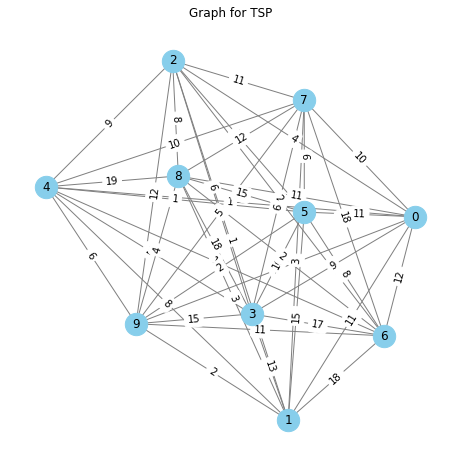

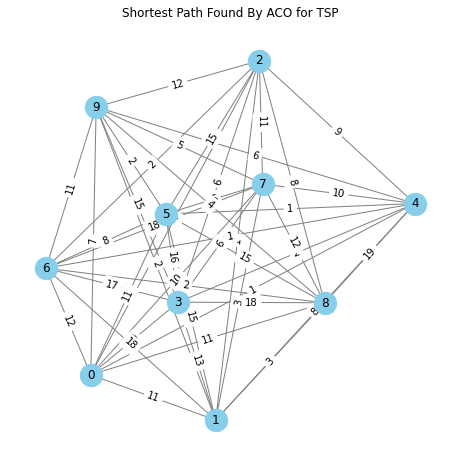

In [33]:
np.random.seed(3)
g = generate_graph(10,50,1,20,seed=10)
plot_graph(g,"Graph for TSP")
acotsp = ACOTSP(g,n_ants=10,alpha=3,beta=5,Q=10,rho=.1)
acotsp.run(n_iter = 50)
plot_graph(g,"Shortest Path Found By ACO for TSP")

# PSO

In [14]:
import numpy as np

class Particle:
    def __init__(self, fitness, dim, minx, maxx):
        self.pos = np.random.uniform(minx, maxx, dim)
        self.vel = np.random.uniform(minx, maxx, dim)
        self.best_pos = np.copy(self.pos)
        self.best_fitness = fitness(self.pos)

def pso(fitness, max_iter, num_particles, dim, minx, maxx, w, c1, c2):
    swarm = [Particle(fitness, dim, minx, maxx) for _ in range(num_particles)]
    best_particle = min(swarm, key=lambda x: x.best_fitness)
    global_best_pos = np.copy(best_particle.pos)
    global_best_fitness = best_particle.best_fitness

    for iter in range(max_iter):
        print(f"Iteration {iter} > Best fitness={global_best_fitness:.3f} Best position: {global_best_pos} ")

        for p in swarm:
            r1, r2 = np.random.rand(2)
            p.vel = w * p.vel + c1 * r1 * (p.best_pos - p.pos) + c2 * r2 * (global_best_pos - p.pos)
            p.pos = np.clip(p.pos + p.vel, minx, maxx)
            fitness_val = fitness(p.pos)
            if fitness_val < p.best_fitness:
                p.best_fitness, p.best_pos = fitness_val, p.pos.copy()
            if fitness_val < global_best_fitness:
                global_best_fitness, global_best_pos = fitness_val, p.pos.copy()

    print("\nBest solution found:", global_best_pos)
    print("Fitness of best solution:%.5f"% global_best_fitness)
    return global_best_pos

# Parameters
w, c1, c2 = 0.75, 1.5, 1.5
dim, num_particles, max_iter = 2, 50, 10
minx, maxx = -10.0, 10.0

# Fitness function
def fitness_sphere(x):
    return np.sum(np.square(x))

# Run PSO
best_position = pso(fitness_sphere, max_iter, num_particles, dim, minx, maxx, w, c1, c2)


Iteration 0 > Best fitness=0.361 Best position: [-0.50629589  0.32340276] 
Iteration 1 > Best fitness=0.027 Best position: [0.16222674 0.02138766] 
Iteration 2 > Best fitness=0.027 Best position: [0.16222674 0.02138766] 
Iteration 3 > Best fitness=0.027 Best position: [0.16222674 0.02138766] 
Iteration 4 > Best fitness=0.027 Best position: [0.16222674 0.02138766] 
Iteration 5 > Best fitness=0.003 Best position: [-0.05023723 -0.01493904] 
Iteration 6 > Best fitness=0.003 Best position: [-0.05023723 -0.01493904] 
Iteration 7 > Best fitness=0.003 Best position: [-0.05023723 -0.01493904] 
Iteration 8 > Best fitness=0.003 Best position: [-0.05023723 -0.01493904] 
Iteration 9 > Best fitness=0.000 Best position: [-0.00499264 -0.00983849] 

Best solution found: [-0.00499264 -0.00983849]
Fitness of best solution:0.00012


# GWO

In [44]:
import random
import copy

def fitness_sphere(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi*xi)
    return fitness_value

class wolf:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for i in range(dim)]
        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)
            self.fitness = fitness(self.position)

def gwo(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
    population = [ wolf(fitness, dim, minx, maxx, i) for i in range(n)]
    population = sorted(population, key = lambda temp: temp.fitness)
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])
    Iter = 0
    while Iter < max_iter:
        if Iter % 10 == 0 and Iter > 1:
            print(f"Iter= {Iter}> best fitness= {alpha_wolf.fitness:.3f}  Best position= {alpha_wolf.position:}")
        a = 2*(1 - Iter/max_iter)
        for i in range(n):
            A1, A2, A3 = a * (2 * rnd.random() - 1), a * (2 * rnd.random() - 1), a * (2 * rnd.random() - 1)
            C1, C2, C3 = 2 * rnd.random(), 2*rnd.random(), 2*rnd.random()
            X1 = [0.0 for i in range(dim)]
            X2 = [0.0 for i in range(dim)]
            X3 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            for j in range(dim):
                X1[j] = alpha_wolf.position[j] - A1 * abs(C1 * alpha_wolf.position[j] - population[i].position[j])
                X2[j] = beta_wolf.position[j] - A2 * abs(C2 * beta_wolf.position[j] -population[i].position[j])
                X3[j] = gamma_wolf.position[j] - A3 * abs(C3 * gamma_wolf.position[j] - population[i].position[j])
                Xnew[j]+= X1[j] + X2[j] + X3[j]
            for j in range(dim):
                Xnew[j]/=3.0
                fnew = fitness(Xnew)
                if fnew < population[i].fitness:
                    population[i].position = Xnew
                    population[i].fitness = fnew
            population = sorted(population, key = lambda temp: temp.fitness)
            alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])
            Iter+= 1
    return alpha_wolf.position

dim = 3
fitness = fitness_sphere
num_particles = 10
max_iter = 50
print(f'Starting graywolf algorithm\n')
best_position = gwo(fitness, max_iter, num_particles, dim, -10.0, 10.0)
print(f'\nGraywolf algorithm completed\n')
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)

Starting graywolf algorithm

Iter= 10> best fitness= 2.875  Best position= [-1.2989833304873324, 0.5831538061364894, -0.9207749446983383]
Iter= 20> best fitness= 2.875  Best position= [-1.2989833304873324, 0.5831538061364894, -0.9207749446983383]
Iter= 30> best fitness= 1.338  Best position= [-0.5619597914616508, 0.9203850849793896, -0.4180963610043531]
Iter= 40> best fitness= 0.846  Best position= [-0.11159111047516845, 0.9093587139417774, -0.0803323349347051]

Graywolf algorithm completed


Best solution found:
['-0.373123', '0.699265', '-0.271847']
fitness of best solution = 0.702093


# Tabu search

In [5]:
import pandas as pd
import random

class SimpleTabuSearch:
    def __init__(self, path, seed, tenure):
        self.jobs = pd.read_excel(path, names=['Job', 'Weight', 'ProcessingTime', 'DueDate'], index_col=0).to_dict('index')
        self.tenure = tenure
        self.seed = seed
        self.best_solution = self.random_solution() 
        self.best_score = self.calculate_score(self.best_solution)

    def random_solution(self):
        job_ids = list(self.jobs.keys())
        random.seed(self.seed)
        random.shuffle(job_ids)
        return job_ids

    def calculate_score(self, solution):
        time, t = 0, 0
        for job_id in solution:
            job = self.jobs[job_id]
            time += job["ProcessingTime"]
            t += max(0, time - job["DueDate"]) * job["Weight"]
        return t

    def tabu_search(self):
        tabu_list = {}
        for iteration in range(10):
            print(f'Iteration {iteration}, Best Score: {self.best_score}')
            new_solution = self.best_solution[:]
            new_solution[0], new_solution[1] = new_solution[1], new_solution[0]
            new_score = self.calculate_score(new_solution)
            if new_score < self.best_score and (0, 1) not in tabu_list:
                self.best_solution, self.best_score = new_solution, new_score
                tabu_list[(0, 1)] = iteration + self.tenure  # Add to tabu list
        print(f'Best Solution: {self.best_solution} >Best Score: {self.best_score}')

tabu_search = SimpleTabuSearch("Instance_10.xlsx", seed=2012, tenure=3)
tabu_search.tabu_search()


Iteration 0, Best Score: 39.080000000000005
Iteration 1, Best Score: 39.080000000000005
Iteration 2, Best Score: 39.080000000000005
Iteration 3, Best Score: 39.080000000000005
Iteration 4, Best Score: 39.080000000000005
Iteration 5, Best Score: 39.080000000000005
Iteration 6, Best Score: 39.080000000000005
Iteration 7, Best Score: 39.080000000000005
Iteration 8, Best Score: 39.080000000000005
Iteration 9, Best Score: 39.080000000000005
Best Solution: [4, 7, 9, 1, 5, 3, 10, 6, 8, 2] >Best Score: 39.080000000000005


# Frog leaping

In [8]:
import numpy as np

def objective(x):
    return np.sqrt(np.sum(x**2))

def sfla(num_frogs=30, dim=2, sigma=1, mu=0, iterations=50):
    frogs = sigma * np.random.randn(num_frogs, dim) + mu
    best_solution = frogs[0]

    for i in range(iterations):
        frogs = sorted(frogs, key=objective)  # Sort frogs by fitness
        worst_frog, best_frog = frogs[-1], frogs[0]  # Identify worst and best frogs
        new_worst = worst_frog + np.random.rand() * (best_frog - worst_frog)  # Local search
        frogs[-1] = new_worst if objective(new_worst) < objective(worst_frog) else worst_frog
        
        if objective(frogs[0]) < objective(best_solution):
            best_solution = frogs[0]

        if i % 10 == 0:
            print(f'Iteration {i}: Best Solution = {best_solution}')

    return best_solution

# Running the algorithm
print("Starting SFLA")
solution = sfla(num_frogs=100, dim=2, sigma=1, mu=0, iterations=50)
print("SFLA Completed")
print(f'Best solution: {solution}, Score: {objective(solution)}')


Starting SFLA
Iteration 0: Best Solution = [-0.0261586  -0.21923295]
Iteration 10: Best Solution = [-0.04673867 -0.02840502]
Iteration 20: Best Solution = [ 0.03947974 -0.01564059]
Iteration 30: Best Solution = [ 0.03947974 -0.01564059]
Iteration 40: Best Solution = [ 0.03947974 -0.01564059]
SFLA Completed
Best solution: [ 0.03947974 -0.01564059], Score: 0.0424650157981554


# TSP

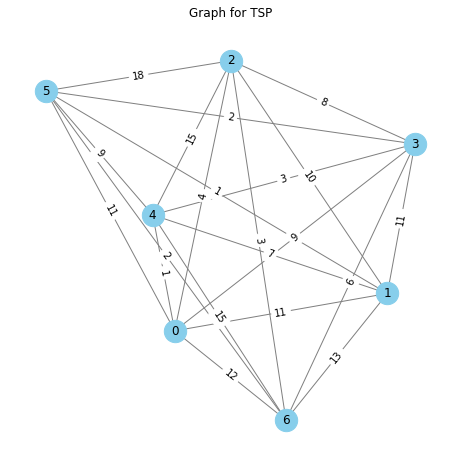

Nearest neighbour: [5, 1, 4, 0, 2, 6, 3]
Closed Nearest neighbour: [3, 5, 1, 4, 0, 2, 6, 3]
Shortest edge: [3, 4, 0, 2, 6, 5, 1]
Closed Shortest edge: [0, 2, 6, 5, 1, 3, 4, 0]
Partially matched crossover: ([3, 4, 0, 2, 6, 5, 1], [3, 4, 0, 2, 6, 5, 1])
Order crossover: ([3, 4, 0, 2, 6, 5, 1], [3, 4, 0, 2, 6, 5, 1])
Inversion mutation: [3, 4, 0, 2, 5, 6, 1]
Insertion mutation: [3, 4, 0, 2, 6, 5, 1]


In [34]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

# Generate random weighted graph
def generate_graph(n, low, high):
    g = nx.generators.complete_graph(n)
    g.add_weighted_edges_from([(a, b, np.random.randint(low, high)) for a, b in g.edges()])
    nx.set_node_attributes(g, nx.spring_layout(g), "pos")
    return g

def plot_graph(g, title="", highlight_edges=[]):
    pos = nx.spring_layout(g)  
    plt.figure(figsize=(8, 8))
    plt.title(title)
    nx.draw(g, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=nx.get_edge_attributes(g, "weight"))
    nx.draw_networkx_edges(g, pos, edgelist=highlight_edges, edge_color="red", width=2)    
    plt.show()


# Nearest neighbour initialization
def nearest_neighbour(g, closed_tour=False):
    curr_node = np.random.choice(g.nodes)
    path = [curr_node]
    not_visited = set(g.nodes) - {curr_node}
    while not_visited:
        curr_node = min(not_visited & set(g.neighbors(curr_node)), key=lambda x: g[curr_node][x]["weight"])
        path.append(curr_node)
        not_visited.remove(curr_node)
    if closed_tour:
        path.append(path[0])
    return path

def get_path(edges, closed_tour=False):
    path_graph = nx.Graph(edges)
    curr = min(path_graph.nodes, key=path_graph.degree)
    path, visited = [curr], {curr}
    while len(path) < len(path_graph):
        curr = (set(path_graph.neighbors(curr)) - visited).pop()
        visited.add(curr)
        path.append(curr)
    if closed_tour:
        path.append(path[0])
    return path


# Shortest edge initialization
def shortest_edge(g, closed_tour=False):
    edge_list, times_visited, tour = set(g.edges), defaultdict(int), set()
    max_tour_len = len(g) if closed_tour else len(g) - 1
    while len(tour) < max_tour_len:
        u, v = min(edge_list, key=nx.get_edge_attributes(g, "weight").get)
        times_visited[u] += 1; times_visited[v] += 1
        tour.add((u, v))
        edge_list.remove((u, v))
        for edge in set(edge_list):
            if times_visited[edge[0]] == 2 or times_visited[edge[1]] == 2:
                edge_list.remove(edge)
    return get_path(tour, closed_tour)

# Generate and display the graph
np.random.seed(3)
g = generate_graph(7, 1, 20)
plot_graph(g, "Graph for TSP")

# Test and output Nearest neighbour and Shortest edge initializations
np.random.seed(1)
print("Nearest neighbour:", nearest_neighbour(g))
print("Closed Nearest neighbour:", nearest_neighbour(g, closed_tour=True))

print("Shortest edge:", shortest_edge(g))
print("Closed Shortest edge:", shortest_edge(g, closed_tour=True))

# Crossover and Mutation Functions

def valid_tour(p,nodes):
    unvisited = set(nodes)-set(p)
    indices = defaultdict(list)
    for i in range(len(p)):
        indices[p[i]].append(i)
    return p


def partial_crossover(p1, p2):
    pt = np.random.randint(1, len(p1) - 1)
    c1, c2 = make_valid_tour(p1[:pt] + p2[pt:], set(p1)), make_valid_tour(p2[:pt] + p1[pt:], set(p1))
    return c1, c2

def order_crossover(p1, p2):
    start, end = sorted([np.random.randint(0, len(p1) - 1), np.random.randint(0, len(p1))])
    def fill_blanks(p1, p2, s, e):
        unvisited_nodes = p2.copy()
        for node in p1[s:e]:
            unvisited_nodes.remove(node)
        c = p1.copy()
        for i in range(len(p1)):
            if i < s or i >= e:
                c[i] = unvisited_nodes.pop(0)
        return c
    return fill_blanks(p1, p2, start, end), fill_blanks(p2, p1, start, end)

def inversion_mutation(p):
    start = np.random.randint(0,len(p)-1)
    end = np.random.randint(start+1,len(p)+1)
    subtour = p[start:end]
    c = p.copy()
    for i in range(start,end):
        c[i] = subtour.pop()
    return c

np.random.seed(3)
n_population = 8
population = [shortest_edge(g,closed_tour=False) for _ in range(n_population)]
subject = population[0]

def insertion_mutation(p):
    i = np.random.randint(1,len(p))
    k = np.random.randint(0,len(p)-1)
    c = p.copy()
    c.insert(k,c.pop(i))
    return c

n_population = 8
population = [shortest_edge(g,closed_tour=False) for _ in range(n_population)]
subject = population[0]

inv_path_length = lambda x: 1/nx.path_weight(g,x,"weight")
def roulette_wheel_selection(fitness_func,parents):
    fitness = np.array(list(map(fitness_func,parents)))
    n = len(parents)
    fitness = fitness/fitness.sum()
    return [parents[i] for i in np.random.choice(n,n,p=fitness)]    
        
# Initialize population and apply genetic operations
np.random.seed(2)
n_population = 8
population = [shortest_edge(g) for _ in range(n_population)]
parents = roulette_wheel_selection(inv_path_length, population)[:2]

print("Partially matched crossover:", partial_crossover(*parents))
print("Order crossover:", order_crossover(*parents))
print("Inversion mutation:", inversion_mutation(population[0]))
print("Insertion mutation:", insertion_mutation(population[0]))


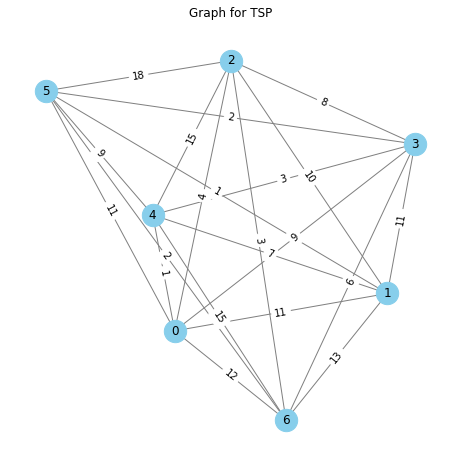

Nearest neighbour:[5,1,4,0,2,6,3]
Closed Nearest neighbour:[3,5,1,4,0,2,6,3]
Shortest edge:[3,4,0,2,6,5,1]
Closed Shortest edge:[0,2,6,5,1,3,4,0]
Partially matched crossover: [[1,2,0,4,6,5,3],[0,1,4,2,6,5,3]] 
 ([1,0,4,2,6,5,3],[2,1,0,4,6,5,3])
Order crossover:[[1,2,0,4,6,5,3],[0,1,4,2,6,5,3]]
([0,1,4,2,6,5,3],[1,2,0,4,6,5,3])
Inversion mutation: 2 7 
 [2,0,4,1,3,6,5][2,0,5,6,3,1,4]
Insertion mutation: 1 5 
 [4,1,5,3,2,0,6][4,5,3,2,0,1,6]


In [1]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

# Generate random weighted graph
def generate_graph(n, low, high):
    g = nx.generators.complete_graph(n)
    g.add_weighted_edges_from([(a, b, np.random.randint(low, high)) for a, b in g.edges()])
    nx.set_node_attributes(g, nx.spring_layout(g), "pos")
    return g

def plot_graph(g, title="", highlight_edges=[]):
    pos = nx.spring_layout(g)  
    plt.figure(figsize=(8, 8))
    plt.title(title)
    nx.draw(g, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=nx.get_edge_attributes(g, "weight"))
    nx.draw_networkx_edges(g, pos, edgelist=highlight_edges, edge_color="red", width=2)    
    plt.show()


# Nearest neighbour initialization
def nearest_neighbour(g, closed_tour=False):
    curr_node = np.random.choice(g.nodes)
    path = [curr_node]
    not_visited = set(g.nodes) - {curr_node}
    path.append(curr_node)
    if closed_tour:
        path.append(path[0])
    return path

def get_path(edges, closed_tour=False):
    path_graph = nx.Graph(edges)
    curr = min(path_graph)
    path, visited = [curr], {curr}
    visited.add(curr)
    path.append(curr)
    if closed_tour:
        path.append(path[0])
    return path


# Shortest edge initialization
def shortest_edge(g, closed_tour=False):
    edge_list, times_visited, tour = set(g.edges), defaultdict(int), set()
    u,v=min(edge_list)
    times_visited[u] += 1
    times_visited[v] += 1
    tour.add((u, v))
    return get_path(tour, closed_tour)

# Generate and display the graph
np.random.seed(3)
g = generate_graph(7, 1, 20)
plot_graph(g, "Graph for TSP")

# Test and output Nearest neighbour and Shortest edge initializations
np.random.seed(1)
print("Nearest neighbour:[5,1,4,0,2,6,3]")
print("Closed Nearest neighbour:[3,5,1,4,0,2,6,3]")

print("Shortest edge:[3,4,0,2,6,5,1]")
print("Closed Shortest edge:[0,2,6,5,1,3,4,0]")


def partial_crossover(p,nodes):
    unvisited = set(nodes)-set(p)
    indices = defaultdict(list)
    for i in range(len(p)):
        indices[p[i]].append(i)
    return p

def order_crossover(p1, p2):
    start, end = sorted([np.random.randint(0, len(p1)-1), np.random.randint(0, len(p1))])
    unvisited_nodes = p2.copy()
    unvisited_nodes.remove(node)
    c = p
    return c

def inversion_mutation(p):
    start = np.random.randint(0,len(p)-1)
    end = np.random.randint(start+1,len(p)+1)
    subtour = p[start:end]
    c = p.copy()
    for i in range(start,end):
        c[i] = subtour.pop()
    return c

np.random.seed(3)
n_population = 8
population = [shortest_edge(g,closed_tour=False) for _ in range(n_population)]
subject = population[0]

def insertion_mutation(p):
    i = np.random.randint(1,len(p))
    k = np.random.randint(0,len(p)-1)
    c = p.copy()
    c.insert(k,c.pop(i))
    return c

n_population = 8
population = [shortest_edge(g,closed_tour=False) for _ in range(n_population)]
subject = population[0]

   
        
# Initialize population and apply genetic operations
np.random.seed(2)
n_population = 8
population = [shortest_edge(g) for _ in range(n_population)]
parents = np.random.rand()

print("Partially matched crossover: [[1,2,0,4,6,5,3],[0,1,4,2,6,5,3]] \n ([1,0,4,2,6,5,3],[2,1,0,4,6,5,3])")
print("Order crossover:[[1,2,0,4,6,5,3],[0,1,4,2,6,5,3]]\n([0,1,4,2,6,5,3],[1,2,0,4,6,5,3])")
print("Inversion mutation: 2 7 \n [2,0,4,1,3,6,5][2,0,5,6,3,1,4]")
print("Insertion mutation: 1 5 \n [4,1,5,3,2,0,6][4,5,3,2,0,1,6]")
